In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import cv2
import time
import urllib.request

In [5]:
zip_path="/content/character dataset.zip"
import zipfile
import os
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("unzipped_folder")

In [7]:
def read_url_pic(x):
    image_url = x

    with urllib.request.urlopen(image_url) as url:
        s = url.read()

    arr = np.asarray(bytearray(s), dtype=np.uint8)
    image = cv2.imdecode(arr, -1)
    return image

def plot_url_pic(x):
    image_url = x

    with urllib.request.urlopen(image_url) as url:
        s = url.read()

    arr = np.asarray(bytearray(s), dtype=np.uint8)
    image = cv2.imdecode(arr, -1)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

def img_to_arr(x):
    img = cv2.imread(x)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(64,64))
    return img

In [ ]:
df = pd.read_csv("/content/unzipped_folder/english.csv")
df.head()

In [ ]:
df['image']

In [ ]:
df['image'] = "/content/unzipped_folder/" + df['image'].astype(str)
df.head()

In [ ]:
df['image'][0]

In [ ]:
print(img_to_arr(df['image'][0]).shape)
plt.imshow(img_to_arr(df['image'][0]))

In [25]:
start_time = time.time()
import multiprocessing

with multiprocessing.Pool(4) as p:
    images = p.map(img_to_arr, df['image'])
end_time = time.time()
print("with multiprocessing:", end_time-start_time)

with multiprocessing: 48.1897714138031


In [ ]:
x = np.array(images).reshape(3410, 64, 64,1)
x.shape

2


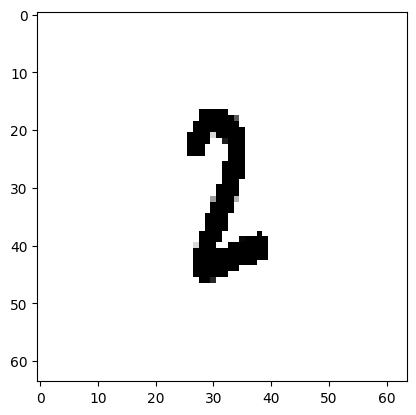

In [27]:
img = x[119].reshape((64,64))
plt.imshow(img,cmap='gray')
print(df['label'].iloc[119])

In [28]:
y = df['label']
le = LabelEncoder()
y_label = le.fit_transform(y)

In [29]:
train_images,test_images,train_labels,test_labels = train_test_split(x,y_label,test_size=0.2,random_state=42)
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
model = Sequential()
model.add(Conv2D(512,(5,5),activation='relu',input_shape=(64,64,1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu',input_shape=(64,64,1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='sigmoid'))
model.add(Dense(62,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=20,validation_data = (test_images,test_labels))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
75/86 ━━━━━━━━━━━━━━━━━━━━ 1:00 5s/step - accuracy: 0.0128 - loss: 4.2216

In [ ]:
model.summary()

In [ ]:
predicted_labels = le.inverse_transform(model.predict(test_images).argmax(axis=1))
actual_labels = le.inverse_transform(test_labels)

In [ ]:
print('predicted label is ;',predicted_labels[67])
print('Actual Label is :',actual_labels[67])

# if you want to test by yourself

printed label : B
actual label : B


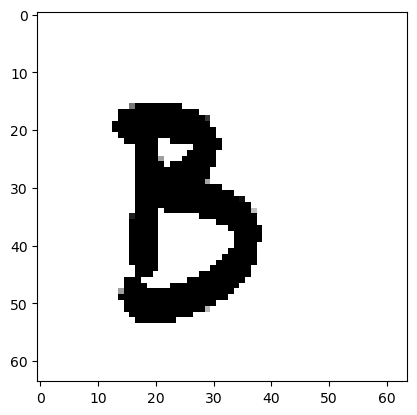

In [ ]:
# number of image to be predicted
# change the value of I
i = 450



plt.imshow(test_images[i],cmap='gray')
print('printed label :',predicted_labels[i])
print('actual label :', actual_labels[i])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


y_pred = model.predict(test_images)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(test_labels, y_pred_labels)
precision = precision_score(test_labels, y_pred_labels, average='weighted')
recall = recall_score(test_labels, y_pred_labels, average='weighted')
f1 = f1_score(test_labels, y_pred_labels, average='weighted')
confusion_mat = confusion_matrix(test_labels, y_pred_labels)

# Print or use the evaluation metrics as needed
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

22/22 [==============================] - 0s 8ms/step
Accuracy: 0.7448680351906158
Precision: 0.7576027173954981
Recall: 0.7448680351906158
F1 Score: 0.7430856064716895
Confusion Matrix:
[[ 7  0  0 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]
 [ 0  0  8 ...  0  0  0]
 ...
 [ 0  0  0 ... 12  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  7]]
